Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

Number of Instances: 45211 for bank-full.csv

Number of Attributes: 16 + output attribute.

Attribute information:

   Input variables:
   # BANK CLIENT DATA:
 1. age (numeric)
 2. job : type of job (categorical: admin.,unknown,unemployed,management,housemaid,entrepreneur,student,blue-collar,self-employed,retired",technician",services) 
 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 4. education (categorical: "unknown","secondary","primary","tertiary")
 5. default: has credit in default? (binary: "yes","no")
 6.  balance: average yearly balance, in euros (numeric) 
 7.  housing: has housing loan? (binary: "yes","no")
 8.  loan: has personal loan? (binary: "yes","no")
   # RELATED WITH THE LAST CONTACT OF TEH CURRENT CAMPAIGN:
 9.  contact: contact communication type (categorical: "unknown","telephone","cellular") 
 10.  day: last contact day of the month (numeric)
 11.  month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 12.  duration: last contact duration, in seconds (numeric)
   # OTHER ATTRIBUTES:
 13.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
 15. previous: number of contacts performed before this campaign and for this client (numeric)
 16.  poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17.- y - has the client subscribed a term deposit? (binary: "yes","no")

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

> load data

In [2]:
df = pd.read_csv("bank-full.csv", sep = ';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

> pada data diatas tidak terdapat null values dan tipe datanya sudah sesuai

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


> Pada data di atas didapatkan nilai rata-rata dari umur adalah 40.9(dibulatkan menjadi 41), dengan std 10.6(dibulatkan menjadi 11) dapat dikatakan rata rata umur pada data diatas adalah 41 tahun, dengan variasi umur antara 30 dan 51 tahun  dari yang termuda berusia 18 tahun dan yang paling tua 95 tahun

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


> data diatas menunjukan informasi umum tentang feature categorical, `unique` mewakili kategori yang berbeda, `top` mewakili kategori yang muncul lebih banyak, dan `freq` adalah frekeuensi dari kategori tersebut

# Prerocessing

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df= df.rename(columns= {"y" : "subscribed"})

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  subscribed  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df_cat=df.select_dtypes(["object"])
df_con=df.drop(columns = df_cat.columns)

In [ ]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [ ]:
df_con.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
df_new = pd.concat([df_cat, df_con], axis=1)

In [ ]:
df_new.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed,age,balance,day,duration,campaign,pdays,previous
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,58,2143,5,261,1,-1,0
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,44,29,5,151,1,-1,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,33,2,5,76,1,-1,0
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,47,1506,5,92,1,-1,0
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,33,1,5,198,1,-1,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         45211 non-null  object
 1   marital     45211 non-null  object
 2   education   45211 non-null  object
 3   default     45211 non-null  object
 4   housing     45211 non-null  object
 5   loan        45211 non-null  object
 6   contact     45211 non-null  object
 7   month       45211 non-null  object
 8   poutcome    45211 non-null  object
 9   subscribed  45211 non-null  object
 10  age         45211 non-null  int64 
 11  balance     45211 non-null  int64 
 12  day         45211 non-null  int64 
 13  duration    45211 non-null  int64 
 14  campaign    45211 non-null  int64 
 15  pdays       45211 non-null  int64 
 16  previous    45211 non-null  int64 
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
df_new.describe(include= "object").T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
subscribed,45211,2,no,39922


# EDA

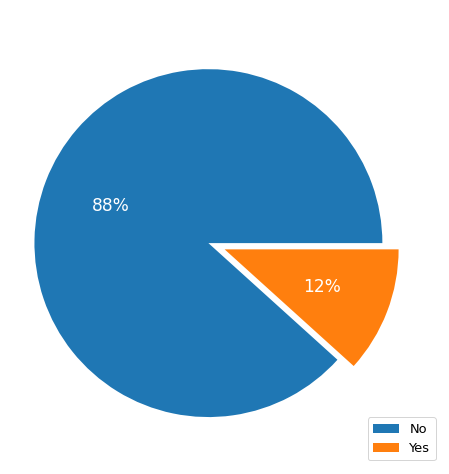

In [ ]:
plt.figure(figsize = (12, 8))

plt.title('subscribed Yes or No?', size = 25, fontweight = 'bold', color = 'white')

labels = 'No', 'Yes'

plt.pie(df_new['subscribed'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower right', fontsize = 13)

plt.show()

In [ ]:
df_new["subscribed"].value_counts()

no     39922
yes     5289
Name: subscribed, dtype: int64

>Sangat terlihat pada data target tidak seimbang ada `88%` yang belum berlangganan atau sebanyak `39922`, dan yang berlangganan hanya `5289`  atau hanya `12%`saja

# Numerical Features

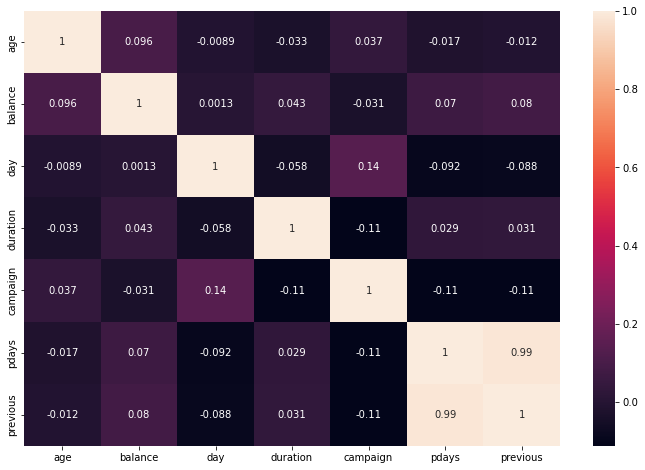

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_con.corr('spearman'), annot = True)
plt.show()

> pada heatmap diatas dapat dilihat masih belum ada korelasi yang cukup signifikan, adapun korelasinya tersebut ialah 
> - **pdays dengan previous**
> - **campaign dengan day**

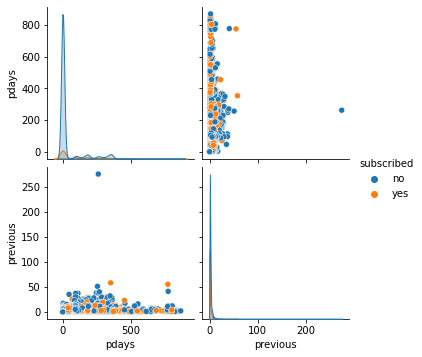

In [ ]:
# pdays vs previous
sns.pairplot(df_new[["pdays", "previous", "subscribed"]], hue="subscribed")
plt.show()

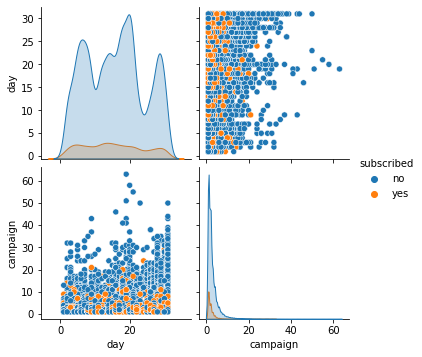

In [ ]:
# day vs campaign
sns.pairplot(df_new[["day", "campaign", "subscribed"]], hue="subscribed")
plt.show()

<AxesSubplot:xlabel='pdays', ylabel='previous'>

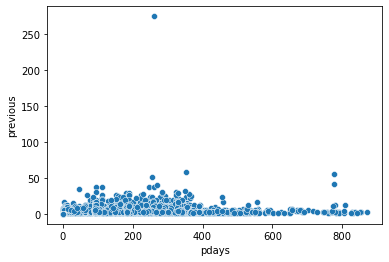

In [ ]:
sns.scatterplot(df["pdays"], df["previous"])

In [ ]:
df_con["previous"][df_con["previous"] > 250]

29182    275
Name: previous, dtype: int64

In [ ]:
df_con_new = df_con.drop([29182]) 

<AxesSubplot:xlabel='pdays', ylabel='previous'>

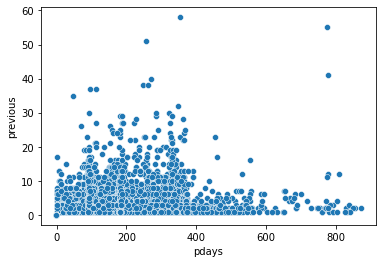

In [ ]:
sns.scatterplot(df_con_new["pdays"], df_con_new["previous"])

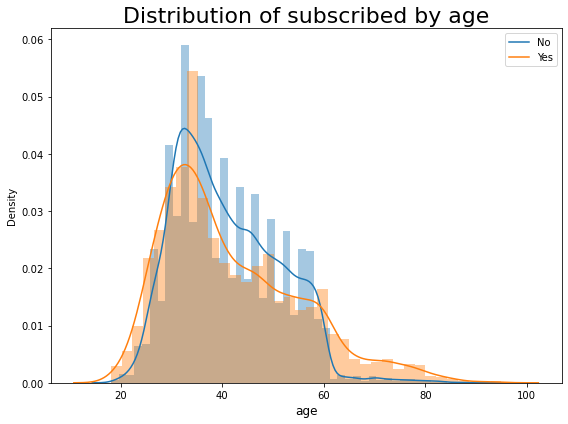

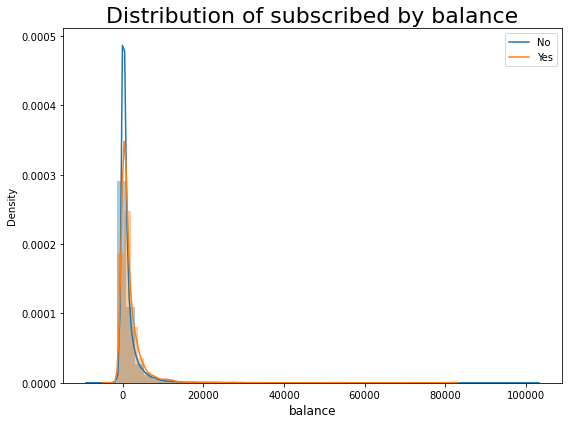

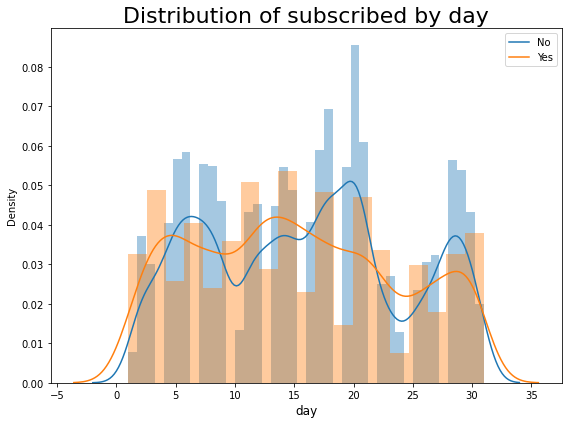

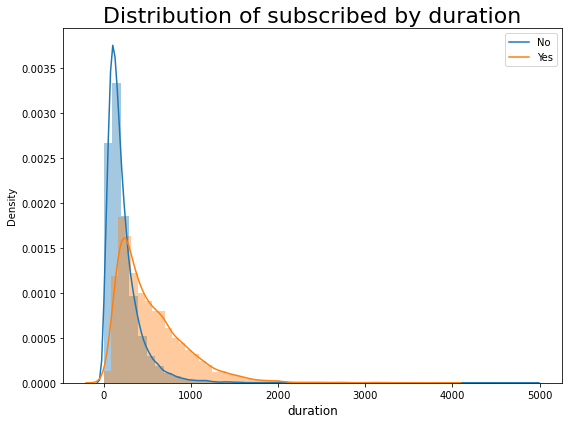

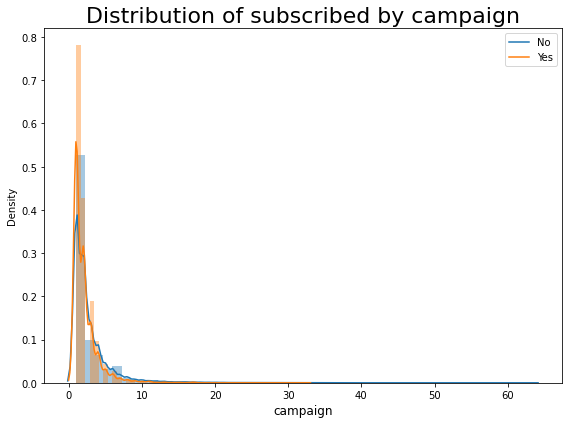

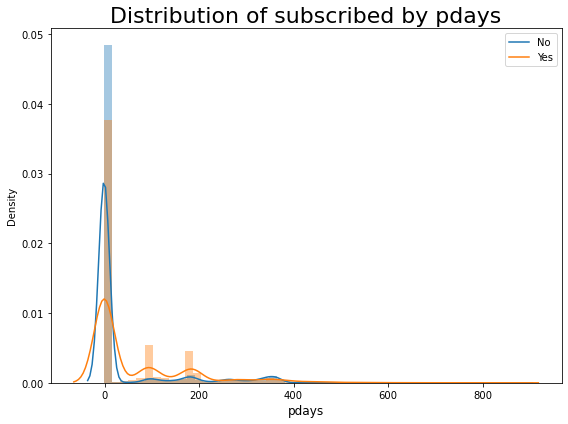

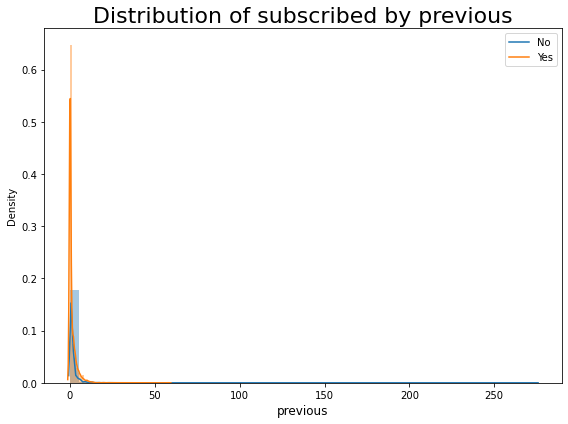

In [ ]:
for i in df_con.columns:
    plt.figure(figsize = (8,6))
    ax = sns.distplot(df_new[(df_new['subscribed'] == 'no')][i])
    ax = sns.distplot(df_new[(df_new['subscribed'] == 'yes')][i])
    
    ax.legend(['No', 'Yes'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of subscribed by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()


In [ ]:
df_con['age'][df_new['subscribed']=='yes'].value_counts().head()

32    221
30    217
33    210
35    209
31    206
Name: age, dtype: int64

In [ ]:
df_con['age'][df_new['subscribed']=='no'].value_counts().head()

32    1864
31    1790
33    1762
34    1732
35    1685
Name: age, dtype: int64

>Pada data age dapat dilihat umur dari client yang berusia rentang **30-35**, yang sudah dan yang belum dalam melakukan deposit terlihat tidak ada perbedaan yang signifikan dari data tersebut

In [ ]:
df_con['balance'][df_new['subscribed']=='yes'].value_counts().head(8)

0       292
1        17
2        16
5        15
294      12
3        12
2557     11
4        11
Name: balance, dtype: int64

In [ ]:
df_con['balance'][df_new['subscribed']=='no'].value_counts().head(8)

0    3222
1     178
2     140
4     128
3     122
5      98
6      82
8      77
Name: balance, dtype: int64

> pada data balance dapat dilihat bahwa client yang melakukan deposit, memiliki balance yang lebih besar dengan di rentang 0-2557, dibandingkan dengan client yang tidak melakukan deposit hanya memiliki balance di kisaran 0-8

In [ ]:
df_con['day'][df_new['subscribed']=='yes'].value_counts().head()

30    271
12    244
13    241
15    238
4     230
Name: day, dtype: int64

In [ ]:
df_con['day'][df_new['subscribed']=='no'].value_counts().head()

20    2560
18    2080
21    1825
17    1763
6     1751
Name: day, dtype: int64

> day merupakan kontak tarakhir yang dilakukan dalam sebulan, client yang dikontak terakhir kali memiliki data yang bervariatif,dan day tertinggi untuk client yang tidak memasukan deposit ada pada day `20`

In [ ]:
df_con['duration'][df_new['subscribed']=='yes'].value_counts().head(8)

261    19
226    17
229    16
232    16
187    16
268    15
158    15
301    15
Name: duration, dtype: int64

In [ ]:
df_con['duration'][df_new['subscribed']=='no'].value_counts().head(8)

124    182
90     181
114    171
89     170
104    169
88     169
112    169
121    169
Name: duration, dtype: int64

> Duration adalah durasi lamanya client dikontak dalam satuan detik. duration pada data cenderung bervariasi,namun client yang melakukan deposit,adalah client yang dikontak paling tinggi yaitu 301 detik,sedangkan client yang tidak melaukan deposite paling tinggi 124, artinya client yang melakukan deposite memiliki duration yang lebih tinggi daripada client yang tidak melakukan deposito

In [ ]:
df_con['campaign'][df_new['subscribed']=='yes'].value_counts().head()

1    2561
2    1401
3     618
4     317
5     139
Name: campaign, dtype: int64

In [ ]:
df_con['campaign'][df_new['subscribed']=='no'].value_counts().head()

1    14983
2    11104
3     4903
4     3205
5     1625
Name: campaign, dtype: int64

> Campaign merupakan banyaknya kontak yang dilakukan pada client pada masa campaign, dapat dilihat campaign tertinggi pada client yang tidak melakukan deposite dan hanya dikontak 1 kali saja pada masa campaign

In [ ]:
df_con['pdays'][df_new['subscribed']=='yes'].value_counts().head()

-1      3384
 92       96
 182      80
 91       75
 181      74
Name: pdays, dtype: int64

In [ ]:
df_con['pdays'][df_new['subscribed']=='no'].value_counts().head()

-1      33570
 370       90
 182       87
 364       73
 350       68
Name: pdays, dtype: int64

> pdays merupakan jumlah hari yang berlalu sejak terakhir kali customer dikontak.(-1 belum dikontak), artinya pada data diatas client yang sudah dan belum melakukan deposit,belum dikontak sama sekali

In [ ]:
df_con['previous'][df_new['subscribed']=='yes'].value_counts().head()


0    3384
1     583
2     456
3     294
4     171
Name: previous, dtype: int64

In [ ]:
df_con['previous'][df_new['subscribed']=='no'].value_counts().head()

0    33570
1     2189
2     1650
3      848
4      543
Name: previous, dtype: int64

> Previous merupakan banyaknya kontak yang dilakukan kepada client, sebelum masa campaign,dapat dilihat dari data diatas banyak client yang sudah dan belum melakukan deposit sama sama belum dikontak sama sekali

# Categorical Features

In [ ]:
# Cramer's V measures the relation between two variables in categorical scale.
def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
corr = []
for i in df_cat:
    matrix = []
    for j in df_new.select_dtypes(['object']):
        matrix.append(cramersv(df_new.select_dtypes(['object'])[i], df_new.select_dtypes(['object'])[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index = df_new.select_dtypes(['object']).columns, columns = df_new.select_dtypes(['object']).columns)

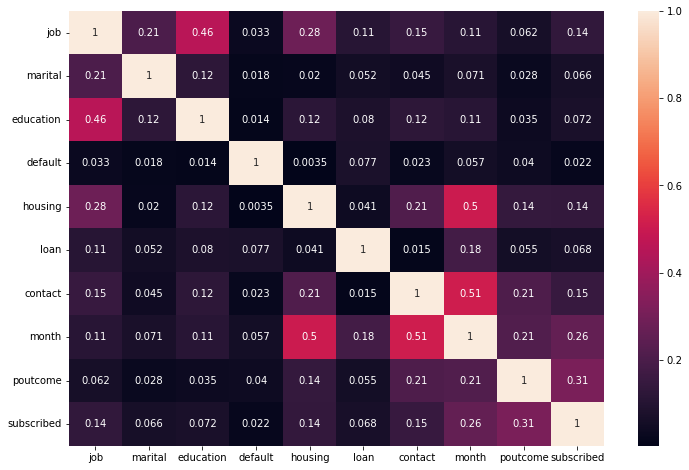

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_cat, annot = True)
plt.show()

>Heatmap diatas, bisa kita lihat korelasi yang sedang yaitu **job dengan education, housing dengan month**,dan **contact dengan month**. juga ada korelasi yang cukup rendah yaitu **job dengan housing, job dengan martial** dan **housing dengan contact**  

> Menunjukan korelasi antara feature menggunakan pd.crosstab()

In [ ]:
pd.crosstab(df_cat['job'], df_cat['education'], normalize = 'columns')

education,primary,secondary,tertiary,unknown
job,,,,
admin.,0.030506,0.181838,0.043004,0.092084
blue-collar,0.548533,0.231489,0.011202,0.244480
entrepreneur,0.026711,0.023360,0.051575,0.040926
housemaid,0.091519,0.017024,0.013007,0.024233
management,0.042913,0.048315,0.586497,0.130318
retired,0.116041,0.042410,0.027517,0.064082
self-employed,0.018975,0.024869,0.062627,0.021002
services,0.050358,0.148996,0.015187,0.080775
student,0.006422,0.021895,0.016766,0.087776


In [ ]:
pd.crosstab(df_cat['housing'], df_cat['month'], normalize = 'columns')

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
housing,,,,,,,,,,,,
no,0.294338,0.823435,0.808411,0.572669,0.628653,0.515881,0.583037,0.763103,0.122766,0.442317,0.773713,0.777202
yes,0.705662,0.176565,0.191589,0.427331,0.371347,0.484119,0.416963,0.236897,0.877234,0.557683,0.226287,0.222798


In [ ]:
pd.crosstab(df_cat['contact'], df_cat['month'], normalize = 'columns')

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
contact,,,,,,,,,,,,
cellular,0.930082,0.952457,0.813084,0.891657,0.901639,0.836403,0.136491,0.874214,0.387258,0.891688,0.754743,0.804836
telephone,0.067872,0.039379,0.172897,0.103435,0.091946,0.123568,0.014978,0.111111,0.033416,0.095466,0.177507,0.113990
unknown,0.002046,0.008164,0.014019,0.004908,0.006415,0.040029,0.848530,0.014675,0.579326,0.012846,0.067751,0.081174


In [ ]:
pd.crosstab(df_cat['job'], df_cat['housing'], normalize = 'columns')

housing,no,yes
job,,
admin.,0.099049,0.126622
blue-collar,0.133659,0.280462
entrepreneur,0.030775,0.034580
housemaid,0.041930,0.015838
management,0.238036,0.186152
retired,0.088292,0.019538
self-employed,0.040536,0.030442
services,0.069120,0.110068
student,0.034311,0.009908


In [ ]:
pd.crosstab(df_cat['job'], df_cat['marital'], normalize = 'columns')

marital,divorced,married,single
job,,,
admin.,0.144037,0.098956,0.135106
blue-collar,0.144037,0.256045,0.157467
entrepreneur,0.034377,0.039318,0.018608
housemaid,0.035337,0.033512,0.011259
management,0.213367,0.198427,0.230414
retired,0.081621,0.063607,0.008444
self-employed,0.026887,0.036489,0.034871
services,0.105435,0.088447,0.093667
student,0.001152,0.001984,0.068647


In [ ]:
pd.crosstab(df_cat['housing'], df_cat['contact'], normalize = 'columns')

contact,cellular,telephone,unknown
housing,,,
no,0.501349,0.597385,0.281336
yes,0.498651,0.402615,0.718664


> Selanjutanya kita akan melakukan eksplorasi pada categorical features menggunakan countplot

> Kolom Described sudah di drop karena merupakan target feature dan sudah tervisualisasi diawal tadi

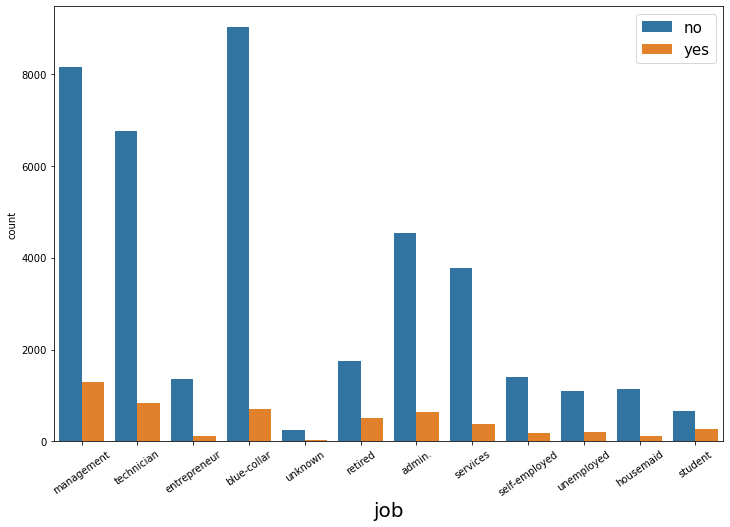

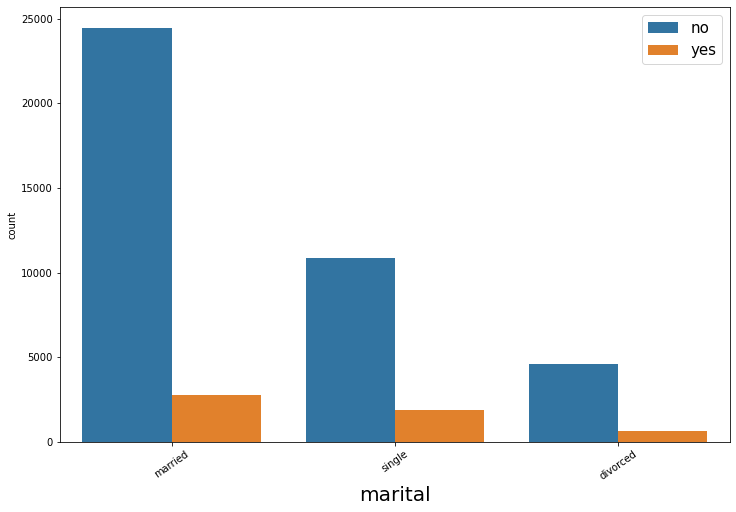

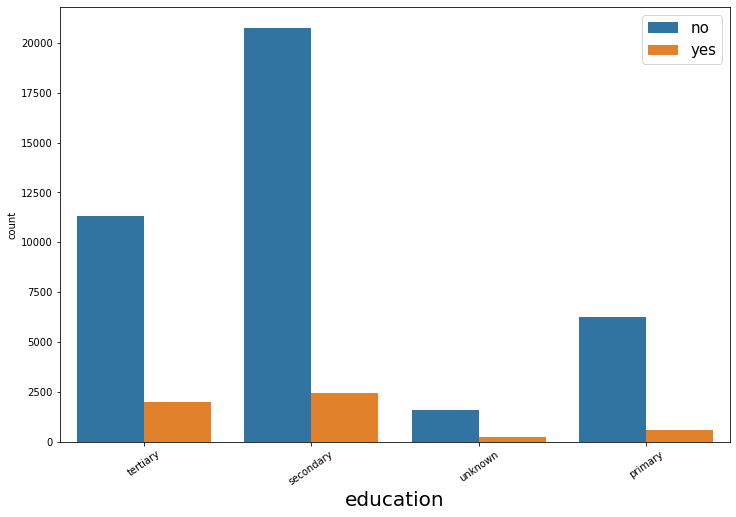

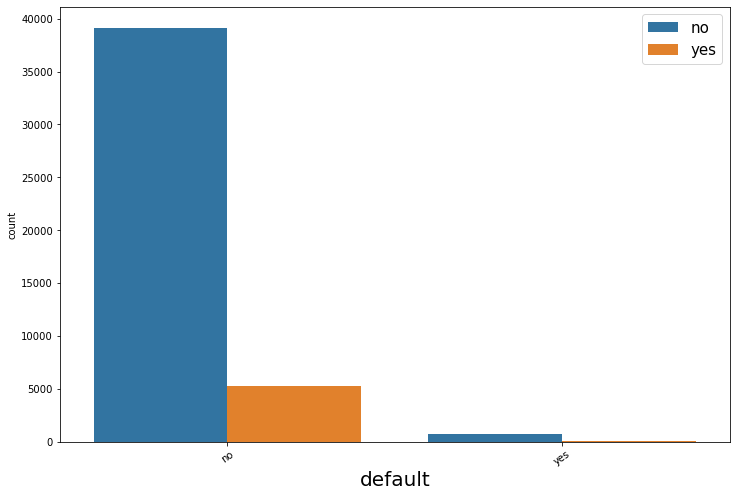

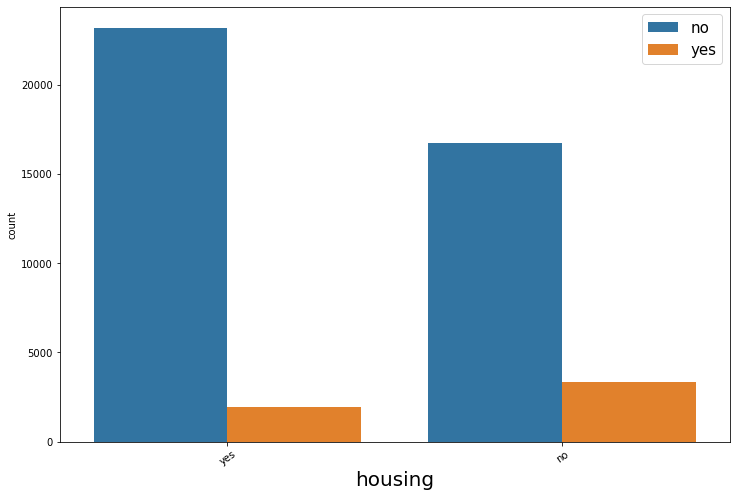

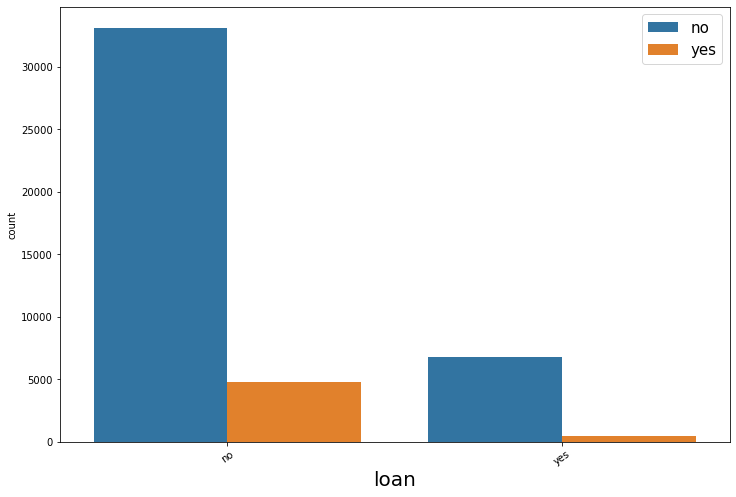

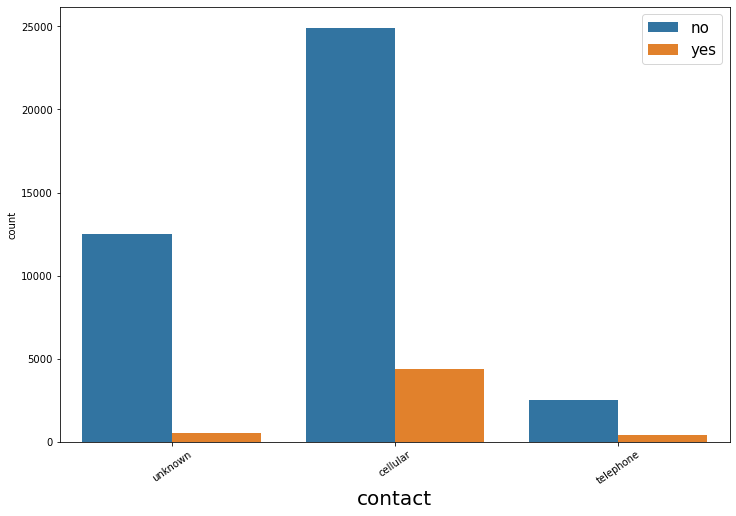

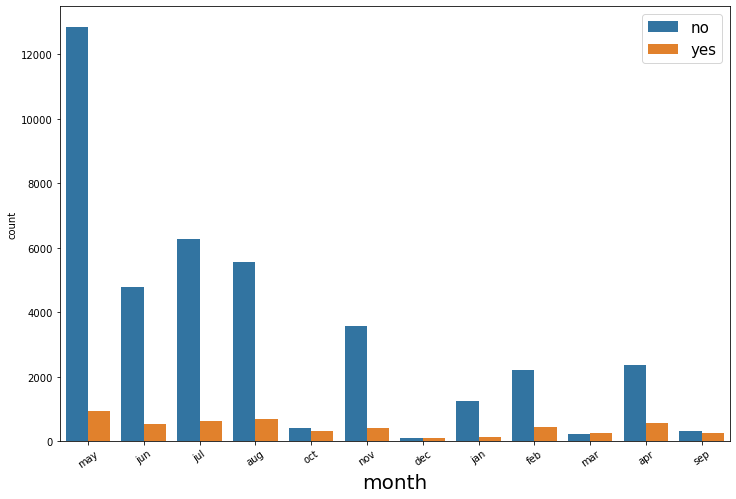

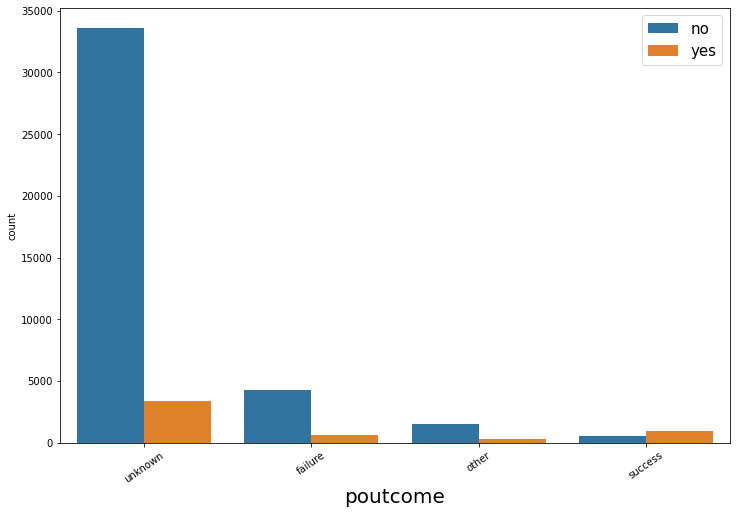

In [ ]:
for i in df_cat.drop(columns = 'subscribed'):
    plt.figure(figsize = (12,8))
    ax = sns.countplot(x = i, data = df_new, hue = 'subscribed')
    plt.xlabel(i, fontsize = 20)
    plt.legend(loc='upper right', fontsize = 15)
    plt.xticks(rotation = 35)
    plt.tight_layout
    plt.show()


>Dari plot diatas bisa kita simpulkan, bahwa kebanyakan client yg tidak melakukan deposit ialah client yg :

- Memiliki pekerjaan sebagai blue-collar, management,dan technician
- Status pernikahannya married / sudah menikah
- Level pendidikannya secondary
- Tidak memiliki credit in default
- Memiliki housing loan
- Tidak memiliki personal loan
- Dihubungi melalui cellular
- terakhir kali dihubungi dibulan Mei
- dan hasil marketing campaign sebelumnya (poutcome) itu tidak diketahui

In [ ]:
# job
df_cat.groupby('subscribed')['job'].value_counts()

subscribed  job          
no          blue-collar      9024
            management       8157
            technician       6757
            admin.           4540
            services         3785
            retired          1748
            self-employed    1392
            entrepreneur     1364
            housemaid        1131
            unemployed       1101
            student           669
            unknown           254
yes         management       1301
            technician        840
            blue-collar       708
            admin.            631
            retired           516
            services          369
            student           269
            unemployed        202
            self-employed     187
            entrepreneur      123
            housemaid         109
            unknown            34
Name: job, dtype: int64

In [ ]:
# marital

df_cat.groupby('subscribed')['marital'].value_counts()

subscribed  marital 
no          married     24459
            single      10878
            divorced     4585
yes         married      2755
            single       1912
            divorced      622
Name: marital, dtype: int64

In [ ]:
# education

df_cat.groupby('subscribed')['education'].value_counts()

subscribed  education
no          secondary    20752
            tertiary     11305
            primary       6260
            unknown       1605
yes         secondary     2450
            tertiary      1996
            primary        591
            unknown        252
Name: education, dtype: int64

In [ ]:
# default

df_cat.groupby('subscribed')['default'].value_counts()

subscribed  default
no          no         39159
            yes          763
yes         no          5237
            yes           52
Name: default, dtype: int64

In [ ]:
# housing

df_cat.groupby('subscribed')['housing'].value_counts()


subscribed  housing
no          yes        23195
            no         16727
yes         no          3354
            yes         1935
Name: housing, dtype: int64

In [ ]:
# loan

df_cat.groupby('subscribed')['loan'].value_counts()


subscribed  loan
no          no      33162
            yes      6760
yes         no       4805
            yes       484
Name: loan, dtype: int64

In [ ]:
# contact

df_cat.groupby('subscribed')['contact'].value_counts()


subscribed  contact  
no          cellular     24916
            unknown      12490
            telephone     2516
yes         cellular      4369
            unknown        530
            telephone      390
Name: contact, dtype: int64

In [ ]:
# month

df_cat.groupby('subscribed')['month'].value_counts()

subscribed  month
no          may      12841
            jul       6268
            aug       5559
            jun       4795
            nov       3567
            apr       2355
            feb       2208
            jan       1261
            oct        415
            sep        310
            mar        229
            dec        114
yes         may        925
            aug        688
            jul        627
            apr        577
            jun        546
            feb        441
            nov        403
            oct        323
            sep        269
            mar        248
            jan        142
            dec        100
Name: month, dtype: int64

# SUMMARY

>Melalui eksplorasi data yg telah kita lakukan, selanjutnya kita dapat menarik kesimpulan bahwa
client yg tidak melakukan deposit ialah client yg :

>Berdasarkan Numerical Features :

> - Berada pada rentang umur 31 - 35 tahun.
> - Kebanyakan memiliki balance < 9 euros
> - Dikontak < 125 detik
> - dan kebanyakan belum dikontak sama sekali.
> Berdasarkan Categorical Features :

> - Memiliki pekerjaan sebagai blue-collar, management, dan technician
> - Status pernikahannya married / sudah menikah
> - Level pendidikannya secondary
> - Tidak memiliki credit in default
> - Memiliki housing loan
> -Tidak memiliki personal loan
> -Dihubungi melalui cellular
> -Terakhir kali dihubungi dibulan Mei
> -dan hasil marketing campaign sebelumnya (poutcome) itu tidak diketahui